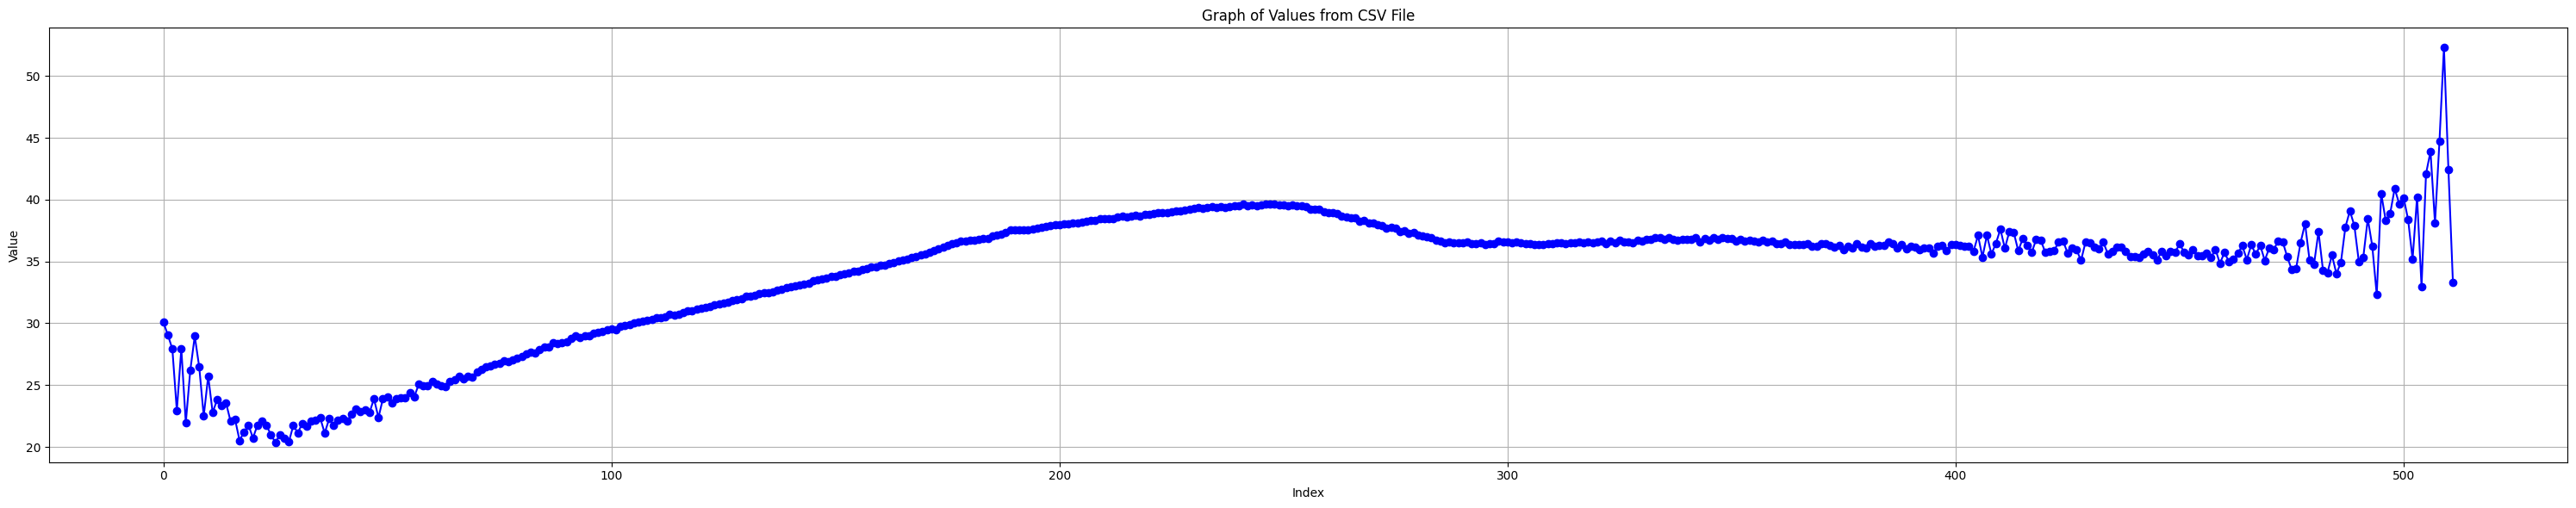

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
csv_file = 'PSR-1100_SN12B4415_M0631.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Step 2: Extract the values
values = data['Reflectance']  # Replace 'Value' with the actual column name if different

# Step 3: Plot the values
plt.figure(figsize=(30, 6))
plt.plot(values, marker='o', linestyle='-', color='b')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Graph of Values from CSV File')
plt.grid(True)
plt.tight_layout()

# Step 4: Show the plot
plt.show()


The dataset contains 512 values.


Enter the start index of the range to zoom:  0
Enter the end index of the range to zoom:  100


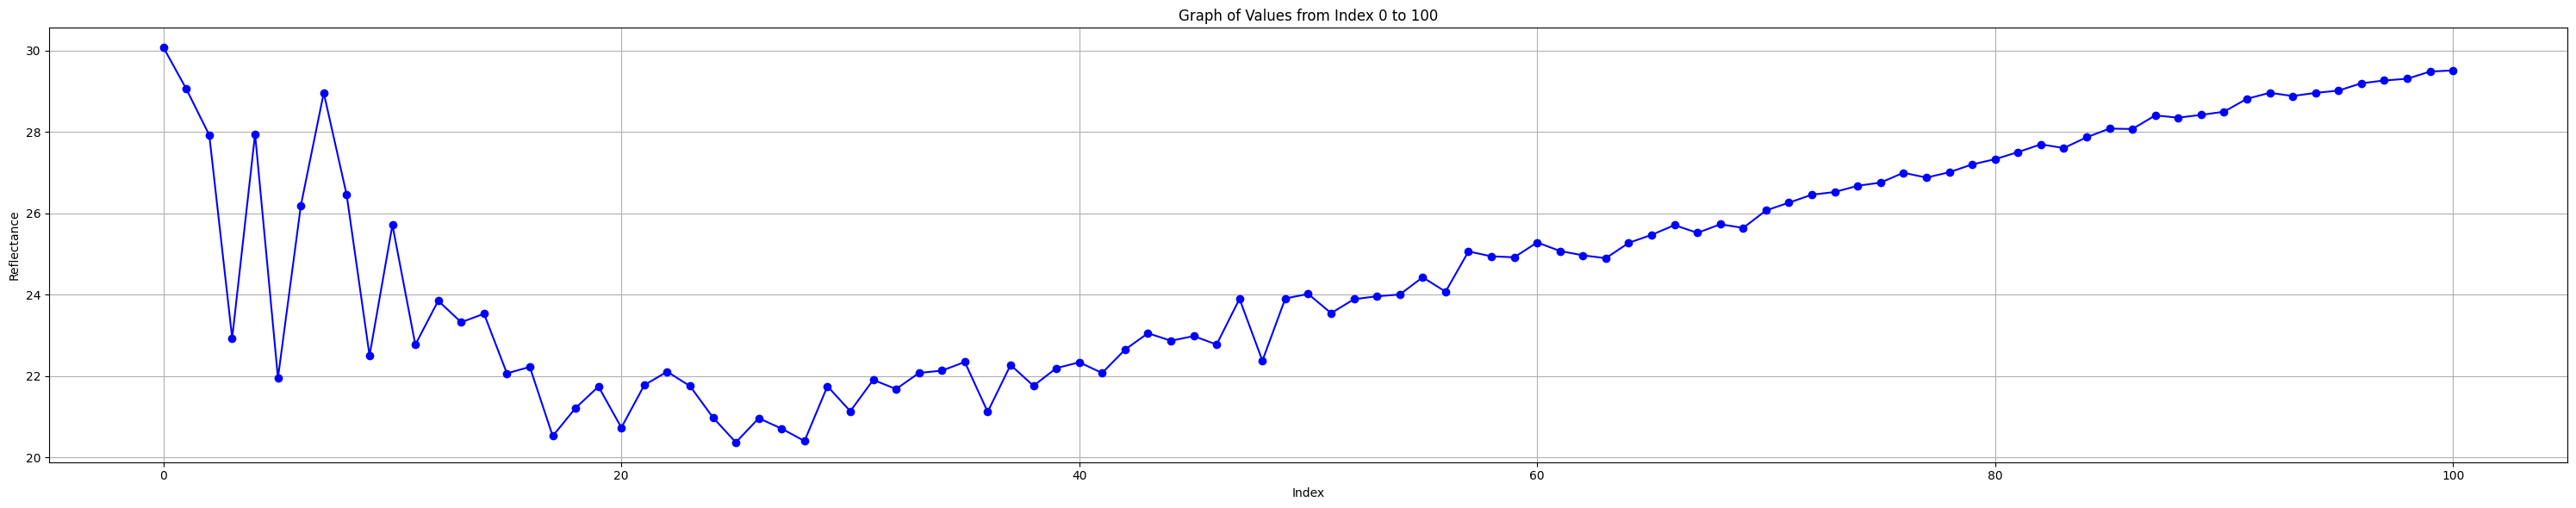

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
csv_file = 'PSR-1100_SN12B4415_M0631.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Step 2: Extract the values
values = data['Reflectance']  # Replace 'Reflectance' with the actual column name if different

# Step 3: Ask the user to input the range
print(f"The dataset contains {len(values)} values.")
start_index = int(input("Enter the start index of the range to zoom: "))
end_index = int(input("Enter the end index of the range to zoom: "))

# Validate the range
if start_index < 0 or end_index >= len(values) or start_index >= end_index:
    print("Invalid range. Please enter valid indices.")
else:
    # Step 4: Plot the values for the specified range
    plt.figure(figsize=(30, 6))
    plt.plot(
        values[start_index:end_index + 1], marker='o', linestyle='-', color='b'
    )
    plt.xlabel('Index')
    plt.ylabel('Reflectance')
    plt.title(f'Graph of Values from Index {start_index} to {end_index}')
    plt.grid(True)
    plt.tight_layout()

    # Step 5: Show the plot
    plt.show()


Spectral Data (y):
[30.0752 29.0541 27.9221 22.9299 27.9503 21.9512 26.1905 28.9617 26.455
 22.5    25.7143 22.7679 23.8494 23.3202 23.5294 22.0641 22.2222 20.5212
 21.2121 21.7391 20.7283 21.7742 22.1053 21.75   20.979  20.3661 20.9607
 20.7039 20.4    21.7476 21.1321 21.9031 21.6783 22.0736 22.1311 22.3438
 21.1161 22.2701 21.7573 22.1929 22.335  22.0732 22.6481 23.0508 22.8665
 22.9801 22.7733 23.8964 22.3744 23.9054 24.0167 23.5437 23.8876 23.9583
 24.0028 24.4265 24.0717 25.0611 24.9421 24.9179 25.2832 25.0725 24.9663
 24.8954 25.273  25.47   25.7093 25.5184 25.7299 25.6402 26.0714 26.2618
 26.4569 26.5237 26.6767 26.7545 26.9972 26.8779 27.0092 27.2016 27.3307
 27.5048 27.6955 27.6042 27.8692 28.0827 28.0732 28.4072 28.3518 28.4199
 28.4979 28.8155 28.9627 28.884  28.9609 29.0175 29.198  29.2658 29.3083
 29.4854 29.5137]

Thresholds:
 Tmin = 20.37, Tl = 18.89, T0 = 17.41, Tr = 23.74, Tmax = 30.08

Global DNA Codewords:
['G', 'G', 'G', 'A', 'G', 'A', 'G', 'G', 'G', 'A', 'G', 'A', 

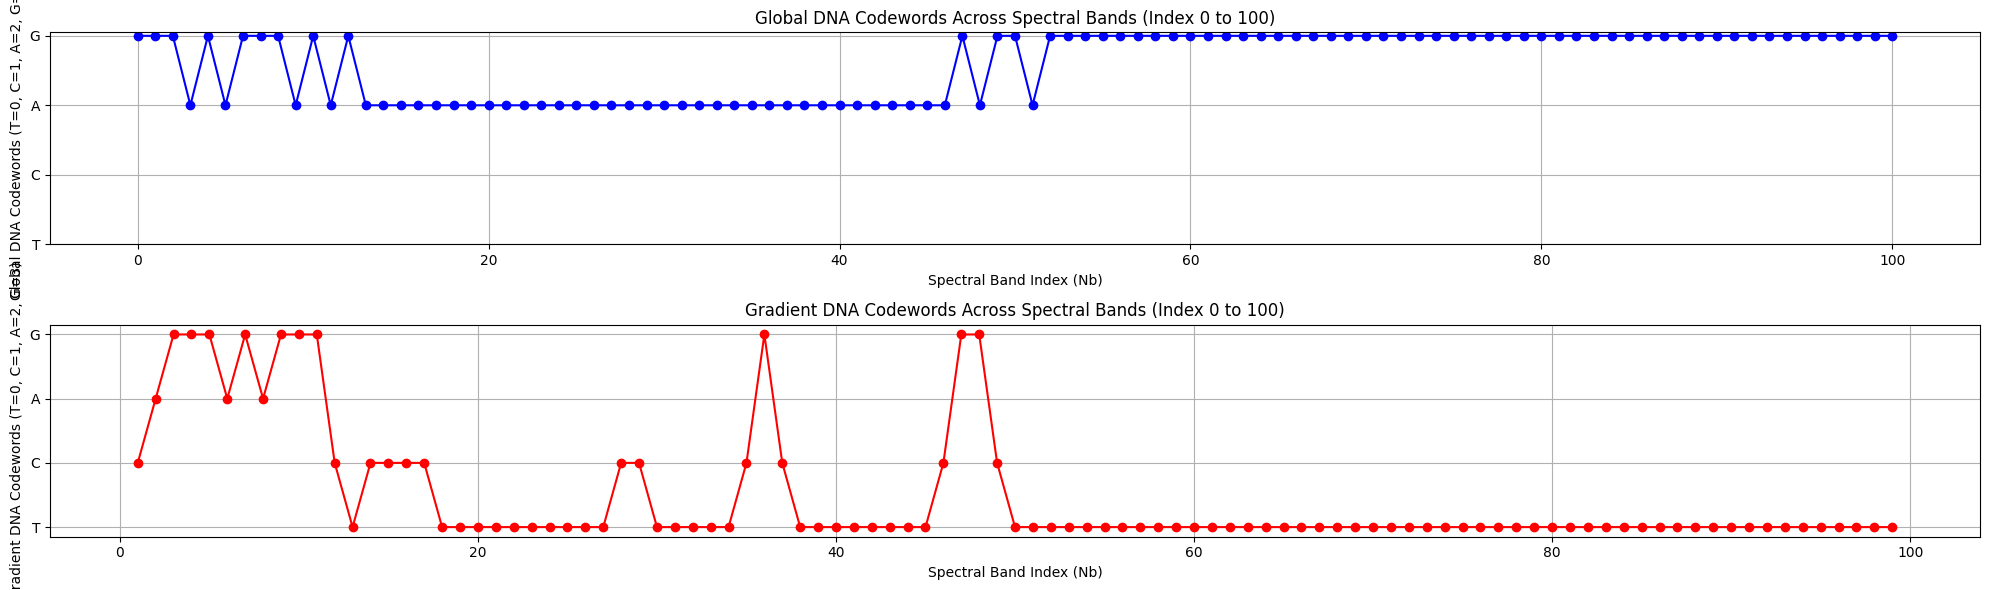

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file (replace with the actual file path)
csv_file = 'PSR-1100_SN12B4415_M0631.csv'  # Replace with actual CSV file
data = pd.read_csv(csv_file)

# Assuming the spectral data column is called 'Reflectance'
y_full = data['Reflectance'].to_numpy()

# Select a zoomed-in portion of the data (e.g., index range 0-100)
start_index, end_index = 0, 100  # Adjust these values as needed
y = y_full[start_index:end_index + 1]  # Extract the zoomed-in portion

# Number of spectral bands in the selected range
Nb = len(y)
print(f"Spectral Data (y):\n{y}\n")

# Step 2: Calculate thresholds (Tmin, Tlow, T0, Thigh, Tmax)
rho = 0.7  # Coefficient for the threshold calculation
T0 = rho * np.mean(y)

# Discretization thresholds
Tmin = np.min(y)
Tmax = np.max(y)
Tl = (Tmin + T0) / 2  # Lower threshold
Tr = (Tmax + T0) / 2  # Upper threshold

print(f"Thresholds:\n Tmin = {Tmin:.2f}, Tl = {Tl:.2f}, T0 = {T0:.2f}, Tr = {Tr:.2f}, Tmax = {Tmax:.2f}\n")

# Step 3: DNA encoding based on thresholds
def dna_encoding(yi, Tmin, Tl, T0, Tr, Tmax):
    if Tmin <= yi < Tl:
        return 'T'  # Category 1
    elif Tl <= yi < T0:
        return 'C'  # Category 2
    elif T0 <= yi < Tr:
        return 'A'  # Category 3
    elif Tr <= yi <= Tmax:
        return 'G'  # Category 4
    else:
        return None

# Apply the encoding to the zoomed-in spectral data
dna_codewords_global = [dna_encoding(yi, Tmin, Tl, T0, Tr, Tmax) for yi in y]
print("Global DNA Codewords:")
print(dna_codewords_global)

# Step 4: Define Gradient Changes and Encode Gradient Features
def encode_gradient_dna(y, delta):
    dna_codewords_gradient = []
    
    for i in range(1, Nb - 1):
        change1 = abs(y[i] - y[i - 1])  # Change from the previous band
        change2 = abs(y[i + 1] - y[i])  # Change to the next band
        
        if change1 <= delta and change2 <= delta:
            dna_codewords_gradient.append('T')  # Type 1
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords_gradient.append('C')  # Type 2
        elif (y[i] - y[i - 1] < -delta and y[i + 1] - y[i] < -delta) or (y[i] - y[i - 1] > delta and y[i + 1] - y[i] > delta):
            dna_codewords_gradient.append('A')  # Type 3
        elif (y[i] - y[i - 1] < -delta and y[i + 1] - y[i] > delta) or (y[i] - y[i - 1] > delta and y[i + 1] - y[i] < -delta):
            dna_codewords_gradient.append('G')  # Type 4
        else:
            dna_codewords_gradient.append(None)  # Fallback

    return dna_codewords_gradient

# Step 4: Calculate delta (tolerance for gradient changes)
theta = 1.5  # Adaptive gradient coefficient
delta = theta * (1 / (Nb - 1)) * np.sum(np.abs(np.diff(y)))

# Encode gradient features for the zoomed-in data
dna_codewords_gradient = encode_gradient_dna(y, delta)
print("\nGradient DNA Codewords:")
print(dna_codewords_gradient)

# Step 5: Plot the results for the zoomed-in data
# Map DNA codewords to numeric values for plotting
codeword_map = {'T': 0, 'C': 1, 'A': 2, 'G': 3}

# Convert codewords to numeric values
dna_numeric_global = [codeword_map[code] for code in dna_codewords_global]
dna_numeric_gradient = [codeword_map[code] if code else -1 for code in dna_codewords_gradient]

# Plotting the DNA codewords
plt.figure(figsize=(20, 6))

# Global DNA codewords plot
plt.subplot(2, 1, 1)
plt.plot(np.arange(start_index, end_index + 1), dna_numeric_global, marker='o', linestyle='-', color='b')
plt.xlabel('Spectral Band Index (Nb)')
plt.ylabel('Global DNA Codewords (T=0, C=1, A=2, G=3)')
plt.title(f'Global DNA Codewords Across Spectral Bands (Index {start_index} to {end_index})')
plt.yticks([0, 1, 2, 3], ['T', 'C', 'A', 'G'])
plt.grid(True)

# Gradient DNA codewords plot
plt.subplot(2, 1, 2)
plt.plot(np.arange(start_index + 1, end_index), dna_numeric_gradient, marker='o', linestyle='-', color='r')
plt.xlabel('Spectral Band Index (Nb)')
plt.ylabel('Gradient DNA Codewords (T=0, C=1, A=2, G=3)')
plt.title(f'Gradient DNA Codewords Across Spectral Bands (Index {start_index} to {end_index})')
plt.yticks([0, 1, 2, 3], ['T', 'C', 'A', 'G'])
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



Processing Section 1:
Thresholds for Section 1:
 Tmin = 2.86, Tl = 2.60, T0 = 2.35, Tr = 3.11, Tmax = 3.87
Global DNA Codewords for Section 1:
['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'A', 'A', 'A', 'A', 'A', 'A']
Gradient DNA Codewords for Section 1:
['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']

Processing Section 2:
Thresholds for Section 2:
 Tmin = 1.84, Tl = 1.73, T0 = 1.62, Tr = 2.22, Tmax = 2.81
Global DNA Codewords for Section 2:
['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
Gradient DNA Codewords for Section 2:
['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']

Processing Section 3:
Thresholds for Section 3:
 Tmin = 1.15, Tl = 1.08, T0 = 1.01, Tr = 1.41, Tmax = 1.80
Global DNA Codewords for Section 3:
['G', 'G

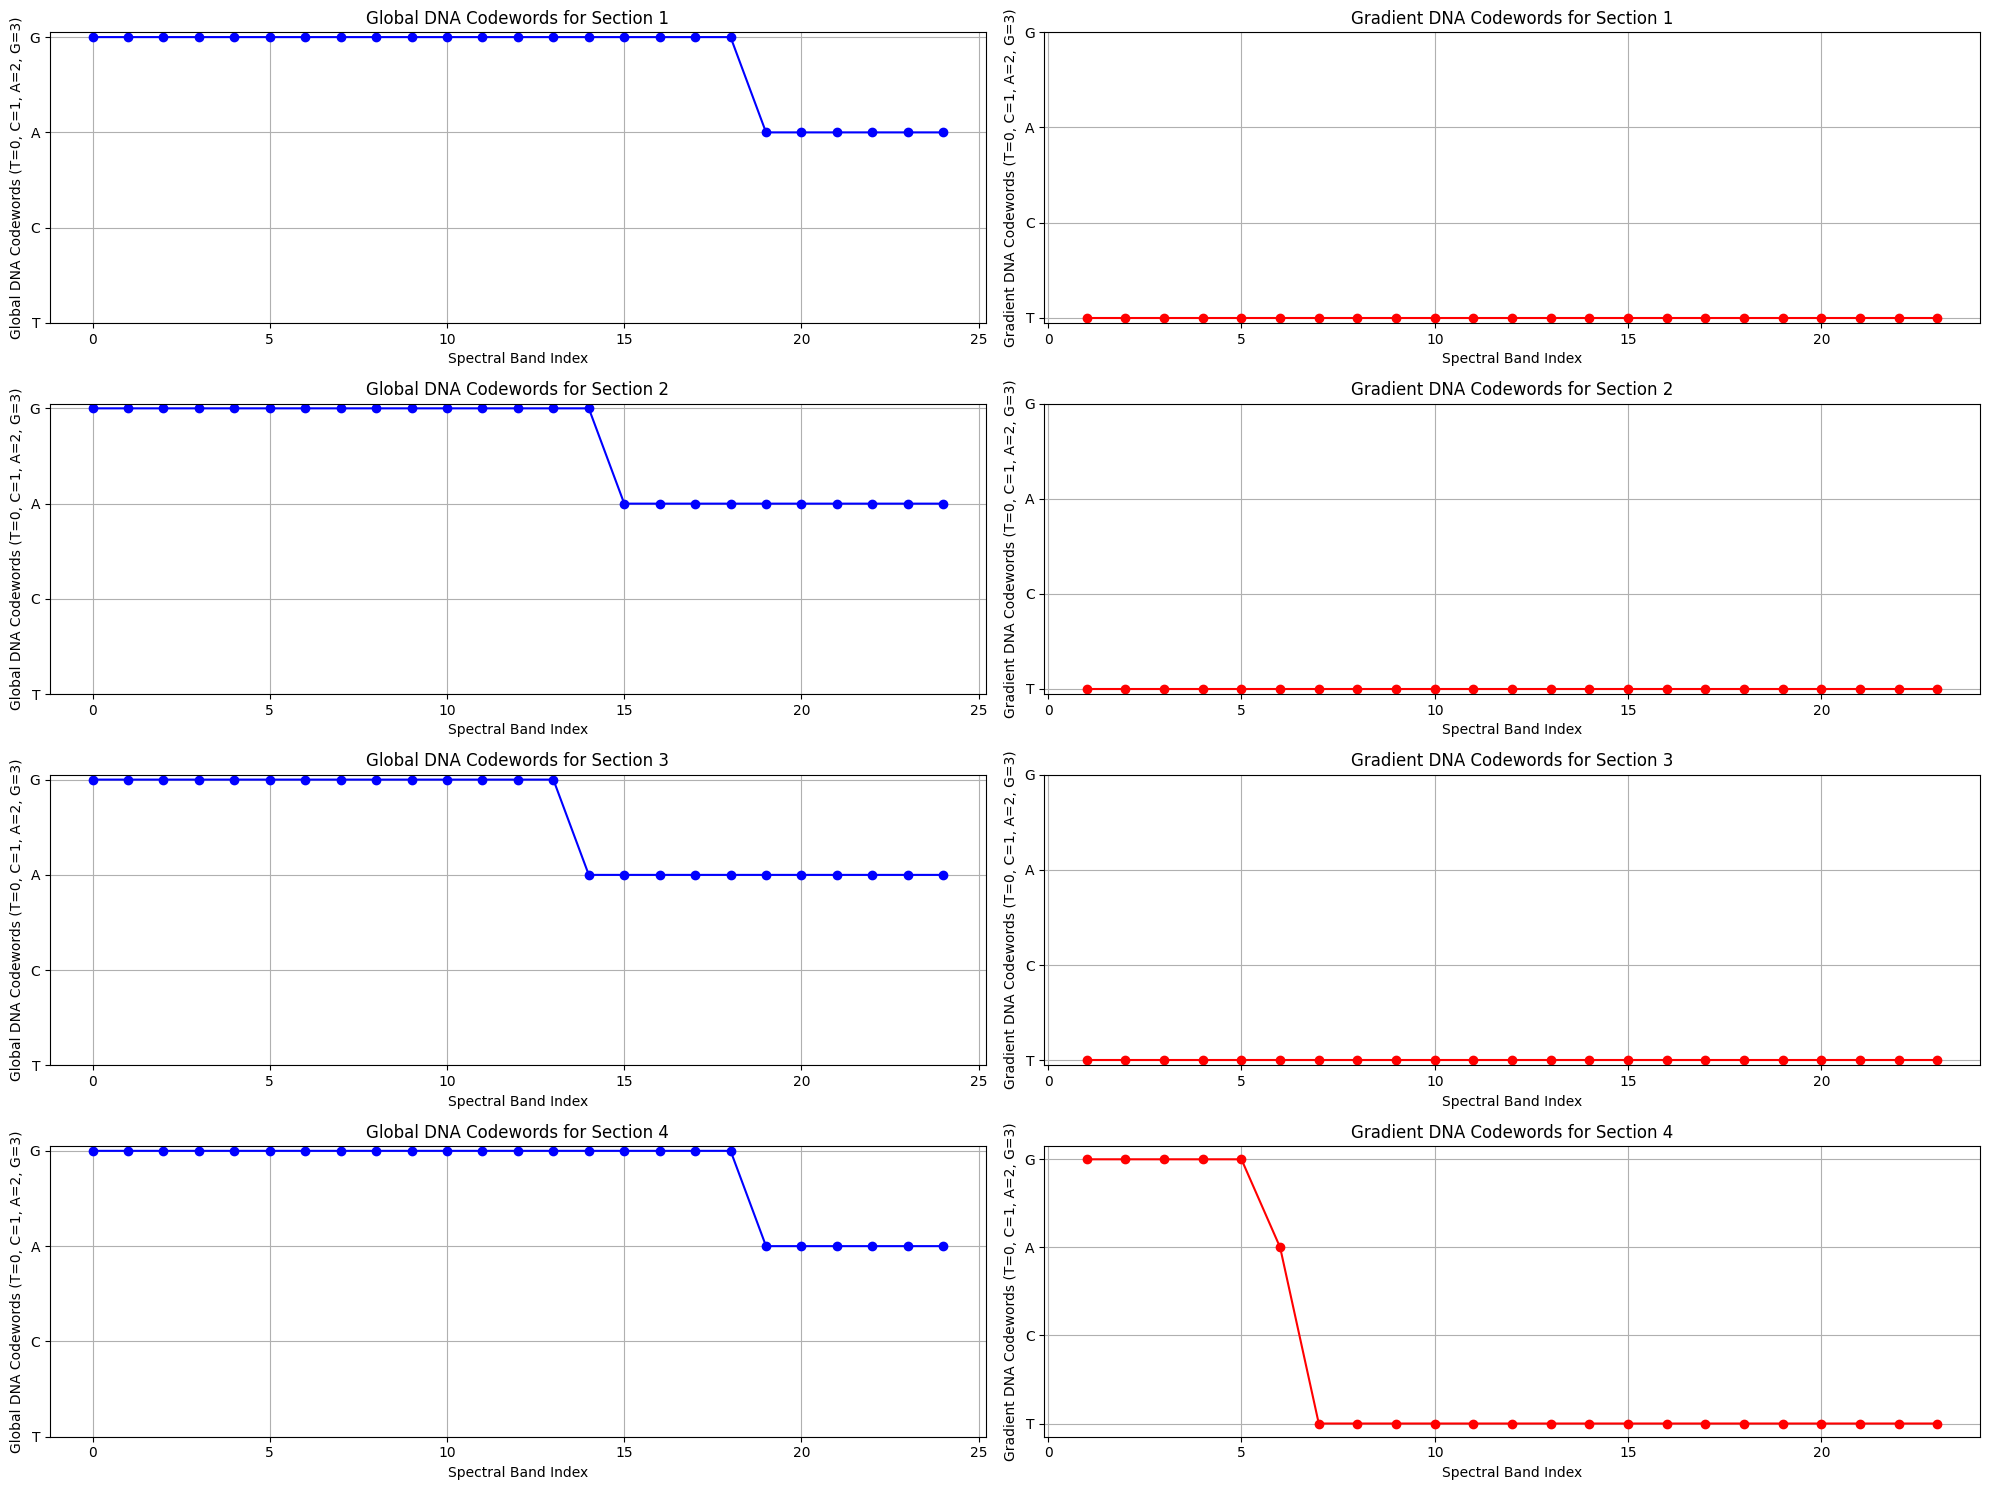

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file (replace with the actual file path)
csv_file = 'tap_water.csv'  # Replace with actual CSV file
data = pd.read_csv(csv_file)

# Assuming the spectral data column is called 'Reflectance'
y = data['Reflectance'].to_numpy()

# Select range [0, 100]
y_zoomed = y[0:100]  # Adjust this range based on your specific data
Nb_zoomed = len(y_zoomed)

# Divide into 4 sections
sections = {
    "Section 1": y_zoomed[0:25],
    "Section 2": y_zoomed[25:50],
    "Section 3": y_zoomed[50:75],
    "Section 4": y_zoomed[75:100]
}

# DNA Gradient Encoding Function (fixed version)
def encode_gradient_dna(y, delta):
    dna_codewords_gradient = []
    Nb = len(y)

    for i in range(1, Nb - 1):  # Loop from 1 to Nb-2 to avoid index out of bounds
        change1 = abs(y[i] - y[i - 1])  # Change from the previous band
        change2 = abs(y[i + 1] - y[i])  # Change to the next band

        if change1 <= delta and change2 <= delta:
            dna_codewords_gradient.append('T')  # Type 1
        elif change1 <= delta and change2 > delta:
            dna_codewords_gradient.append('C')  # Type 2
        elif change1 > delta and change2 <= delta:
            dna_codewords_gradient.append('A')  # Type 3
        elif change1 > delta and change2 > delta:
            dna_codewords_gradient.append('G')  # Type 4

    return dna_codewords_gradient

# DNA Encoding Function for Global DNA Encoding
def dna_encoding(yi, Tmin, Tl, T0, Tr, Tmax):
    if Tmin <= yi < Tl:
        return 'T'  # Type 1
    elif Tl <= yi < T0:
        return 'C'  # Type 2
    elif T0 <= yi < Tr:
        return 'A'  # Type 3
    elif Tr <= yi <= Tmax:
        return 'G'  # Type 4

# Function for processing each section
def process_section(section_data, section_name):
    print(f"\nProcessing {section_name}:")
    T0 = rho * np.mean(section_data)
    Tmin = np.min(section_data)
    Tmax = np.max(section_data)
    Tl = (Tmin + T0) / 2  # Lower threshold
    Tr = (Tmax + T0) / 2  # Upper threshold

    print(f"Thresholds for {section_name}:\n Tmin = {Tmin:.2f}, Tl = {Tl:.2f}, T0 = {T0:.2f}, Tr = {Tr:.2f}, Tmax = {Tmax:.2f}")

    # Global DNA Encoding
    dna_codewords_global = [
        dna_encoding(yi, Tmin, Tl, T0, Tr, Tmax) for yi in section_data
    ]
    
    # Print Global DNA Codewords
    print(f"Global DNA Codewords for {section_name}:")
    print(dna_codewords_global)
    
    # Calculate delta for gradient encoding
    theta = 1.5
    delta = theta * (1 / (len(section_data) - 1)) * np.sum(np.abs(np.diff(section_data)))
    
    # Gradient DNA Encoding
    dna_codewords_gradient = encode_gradient_dna(section_data, delta)
    
    # Print Gradient DNA Codewords
    print(f"Gradient DNA Codewords for {section_name}:")
    print(dna_codewords_gradient)

    return dna_codewords_global, dna_codewords_gradient

# Step 2: Plot each section
plt.figure(figsize=(20, 15))
codeword_map = {'T': 0, 'C': 1, 'A': 2, 'G': 3}

# Processing and plotting each section
rho = 0.7  # Coefficient for threshold calculation
for i, (section_name, section_data) in enumerate(sections.items()):
    dna_codewords_global, dna_codewords_gradient = process_section(section_data, section_name)

    # Convert DNA codewords to numeric values for plotting
    dna_numeric_global = [codeword_map[code] for code in dna_codewords_global]
    dna_numeric_gradient = [codeword_map[code] if code else -1 for code in dna_codewords_gradient]

    # Plot Global DNA Codewords
    plt.subplot(4, 2, i * 2 + 1)
    plt.plot(np.arange(len(section_data)), dna_numeric_global, marker='o', linestyle='-', color='b')
    plt.xlabel('Spectral Band Index')
    plt.ylabel('Global DNA Codewords (T=0, C=1, A=2, G=3)')
    plt.title(f'Global DNA Codewords for {section_name}')
    plt.yticks([0, 1, 2, 3], ['T', 'C', 'A', 'G'])
    plt.grid(True)

    # Plot Gradient DNA Codewords
    plt.subplot(4, 2, i * 2 + 2)
    plt.plot(np.arange(1, len(section_data) - 1), dna_numeric_gradient, marker='o', linestyle='-', color='r')
    plt.xlabel('Spectral Band Index')
    plt.ylabel('Gradient DNA Codewords (T=0, C=1, A=2, G=3)')
    plt.title(f'Gradient DNA Codewords for {section_name}')
    plt.yticks([0, 1, 2, 3], ['T', 'C', 'A', 'G'])
    plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
